**Introduction**

When we hear about hotel booking we definitely looks the best option available with reasonable price. The main few things I will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we ae able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).



**Column information**

Hotel

        1. H1: Resort hotel
        2. H2: City hotel

is_canceled
    
        *  1: Canceled
        *  0: Not canceled


 lead_time
        
        *   No of days thaat elapsed between entering date of booking into property management system and arrival date


arrival_date_year
        
        *  Year of arrival date (2015-2017)

arrival_date_month

        *   Month of arrival date (Jan - Dec)

 arrival_date_week_numberr

        *  Week number of year for arrival date (1-53)

arrival_date_day_of_month

        *   Day of arrival date

stays_in_week_nights

        *  No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel

stays_in_week_nights

        *   No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel

*   Adults

    Children

    Babies

  meal
        *   Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one
         other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

 country

market_segment (a group of people who share one or more common characteristics, lumped together for marketing purposes)


*   TA: Travel agents

*   TO: Tour operators


distribution_channel (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)

*  TA: Travel agents
*  TO: Tour operators

is_repeated_guest (value indicating if the booking name was from repeated guest)
*   1: Yes
*   0: No

previous_cancellations

      Number of previous bookings that were cancelled by the customer prior to the current booking
previous_bookings_not_canceled

     Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type

      Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type

      Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes

      Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type

      Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent

      ID of the travel agency that made the booking

 company

ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

day_in_waiting_list

Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type

*   Contract - when the booking has an allotment or other type of contract associated to it;

*   Group – when the booking is associated to a group;

*   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

*  Transient-party – when the booking is transient, but is associated to at least other transient booking

adr (average daily rate)

 average daily rate = 𝑆𝑢𝑚𝑂𝑓𝐴𝑙𝑙𝐿𝑜𝑑𝑔𝑖𝑛𝑔𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛 /𝑇𝑜𝑡𝑎𝑙𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑆𝑡𝑎𝑦𝑖𝑛𝑔𝑁𝑖𝑔ℎ𝑡
  
required_car_parking_spaces

      Number of car parking spaces required by the customer

total_of_special_requests

      Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status

*   Canceled – booking was canceled by the customer;
*   Check-Out – customer has checked in but already departed;
*   No-Show – customer did not check-in and did inform the hotel of the reason

reservation_status_date

      Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel






















In [97]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [99]:
!ls "/content/gdrive/My Drive/hotel_bookings.csv"

'/content/gdrive/My Drive/hotel_bookings.csv'


In [104]:
csv_file="/content/gdrive/My Drive/hotel_bookings.csv"

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc


In [2]:
pip install pycountry

     |████████████████████████████████| 10.1MB 2.7MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=bd8b2bcff1dc7fa1e67b54c840f78da8b22850d40673faf4f3e3af1a17b88719
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

In [105]:
df = pd.read_csv(csv_file)

In [106]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

we have quite alot of data to work with

In [7]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
cols = df.columns
for i in cols:
    print('\n',i,'\n',df[i].unique(),'\n','-'*80)


 hotel 
 ['Resort Hotel' 'City Hotel'] 
 --------------------------------------------------------------------------------

 is_canceled 
 [0 1] 
 --------------------------------------------------------------------------------

 lead_time 
 [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302

**count how many NaN or Null values we have-**

In [12]:
#Checking the missing values in the columns

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have quite alot of NaN values in company and agent.Highly doubt they have an impact on the analysis and will remove the 2 columns. The reason why we can't remove rows with NaN value is because that will mean we are removing 112593 rows out of 119390 rows. So removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant.
This can be done using data.drop(columns = ['agent', 'company']).

In [22]:
df = df.drop(columns = ['agent', 'company'])

**Now we will just need to remove 488 rows with the NaN values. 488 rows out of 119390 is negligible hence I will just remove.**

In [25]:
df = df.dropna(axis = 0)

# Check to see if there are any more NaN data 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Overview of the type of hotel-**

Since there are only 2 types (resort or city), we can simply use a barchart or pie chart to show.

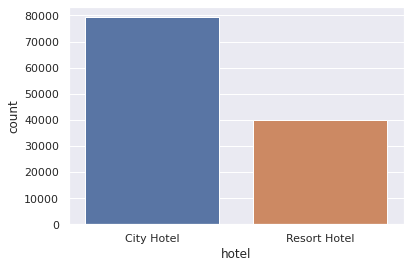

In [14]:
sns.set_theme(style="darkgrid")
sns.barplot(x='hotel', y='is_canceled', data=df.groupby('hotel').is_canceled.count().reset_index())
plt.ylabel ('count')
plt.show()

The above bar graph shows that hotel column consist of two types - city hostel and Resort hotel and the maximum number of booking is of city hotel.

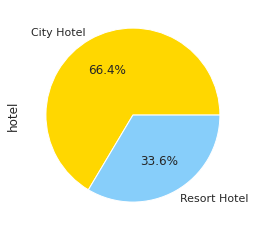

In [15]:
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors = ['gold', 'lightskyblue'])

It seems that a huge proportion of hotels was city hotel.
 
Resort hotel tend to be on the expensive side and most people will just stick 
with city hotel.

Also, resort hotels tend to be appropriate for larger group of people.(proof later)

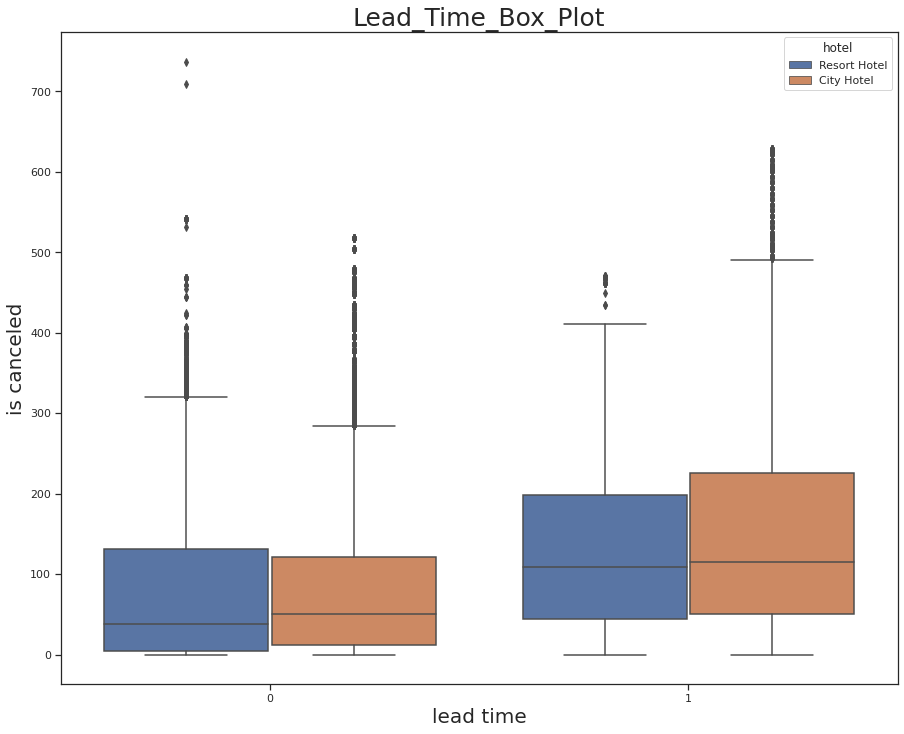

In [16]:
# We can use a histogram to visualize lead_time
sns.set(style='ticks')
plt.figure(figsize=(15,12))
ax = sns.boxplot(x=df['is_canceled'],y=df['lead_time'],hue=df['hotel'])
ax.set_title('Lead_Time_Box_Plot', size=25)
plt.xlabel('lead time',fontsize=20)
plt.ylabel('is canceled',fontsize=20)
plt.show()

From the bot plot, we can conclude that when lead_time is higher, there is a higher chance that a customer cancel the resevation and it makes sense.

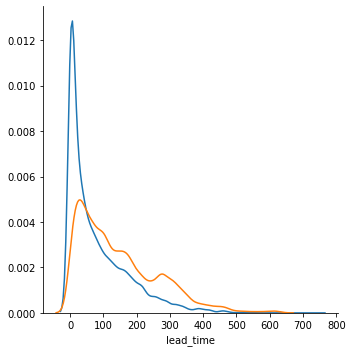

In [15]:
#what does the lead time convey about the hotel cancelation
g = sns.FacetGrid(df, hue="is_canceled", height=5) #,xlim=(0,500))
g = g.map(sns.kdeplot, "lead_time")

kde plot to show the lead time of city hotels and resort hotels. I have found that lead time is maximum in the case of city Hotel.





**Overview of canceled bookings-**

There are two ways either canceled or not canceled.

0-not canceled

1-canceled

In [26]:
#Count of canceled and not canceled data
df.groupby('is_canceled')['hotel'].count()

is_canceled
0    74745
1    44153
Name: hotel, dtype: int64

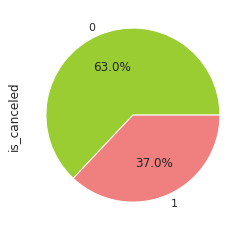

In [17]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors = ['yellowgreen', 'lightcoral'])

It looks like 37% of booking is canceled and around 63% of hotel booking is confirmed.

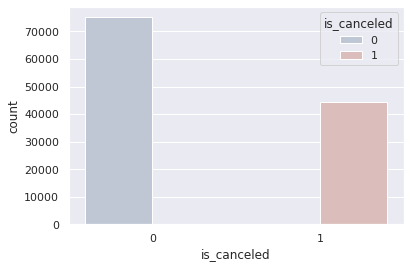

In [18]:


#checking the count of the is canceled
sns.set_theme(style="darkgrid")
sns.countplot(x='is_canceled',data=df ,palette="vlag",hue='is_canceled')



It seems that majority of the bookings were not canceled.

# Let's look at the hostel wise cancelation of booking .
0 - not canceled

1- canceled

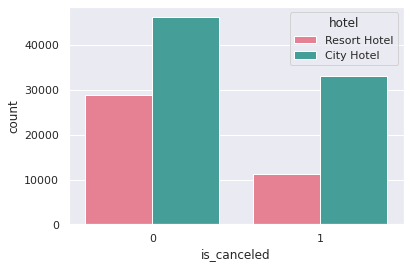

In [19]:
sns.countplot(x='is_canceled',hue='hotel',data=df,palette="husl")

The graph shows the is_canceled column data into type of hotels. We analyse that maximum cancelation of hotels was done in city hotel than resort Hostel.

# classify all market segments and count the number of records of each type of the market segment.


In [20]:
df.groupby('market_segment')['hotel'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: hotel, dtype: int64

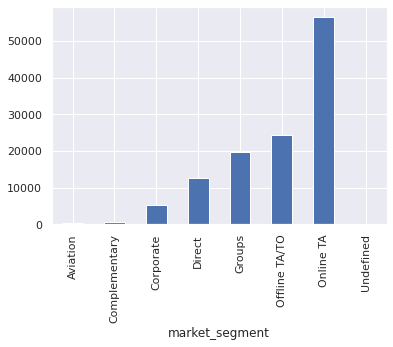

In [21]:
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

Text(0.5, 1.0, 'Types of market segment')

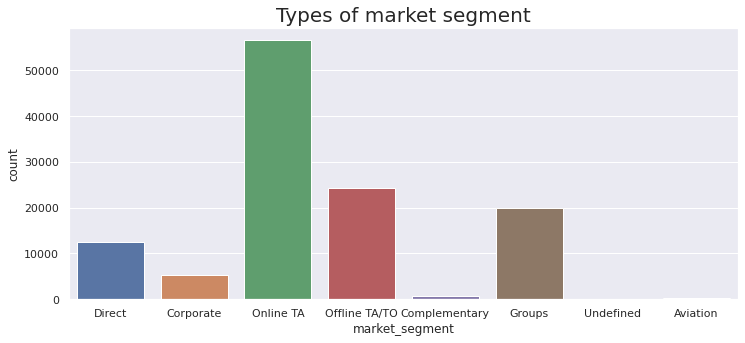

In [65]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

**Types of distribution channels-**

Text(0.5, 1.0, 'Types of distribution channel')

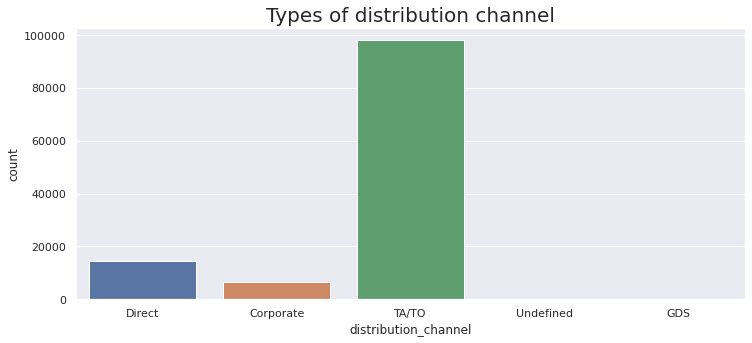

In [67]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

Majority of the distribution channels and market segments involve travel agencies (online or offline).

We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

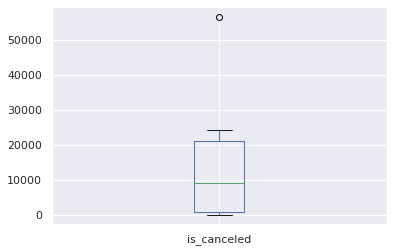

In [ ]:
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='box')

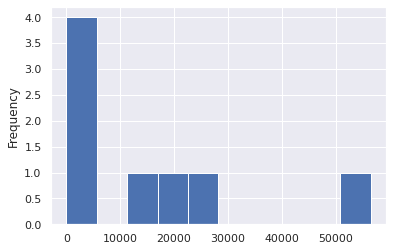

In [ ]:
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='hist')

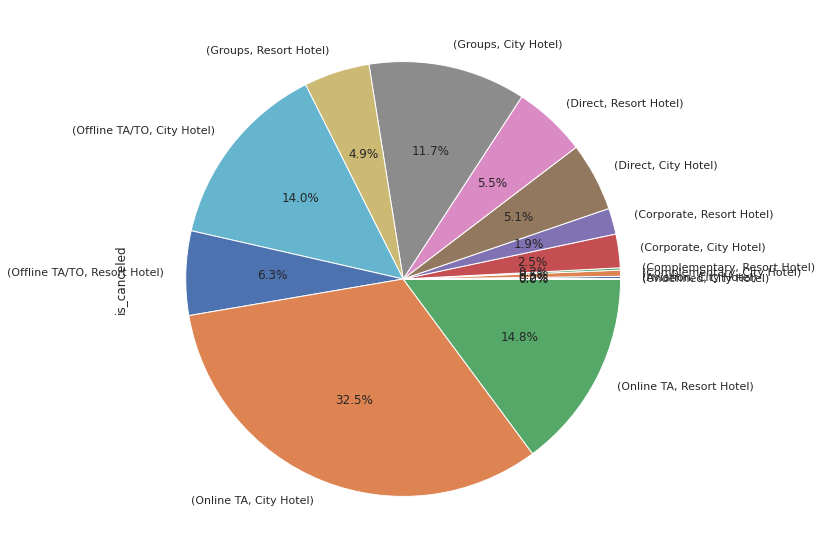

In [ ]:
#how does the market segment, hotel,cancelation look
plt.figure(figsize=(20,10))
df.groupby(['market_segment','hotel'])['is_canceled'].count().plot(kind='pie',autopct='%1.1f%%')

Pie chart describing all market segments and distribution channels with types of hotels.

**Overview of arrival period-**

In [16]:
df.groupby(['hotel','arrival_date_day_of_month'])['is_canceled'].count()

hotel         arrival_date_day_of_month
City Hotel    1                            2332
              2                            2667
              3                            2530
              4                            2461
              5                            2857
                                           ... 
Resort Hotel  27                           1265
              28                           1276
              29                           1214
              30                           1473
              31                            856
Name: is_canceled, Length: 62, dtype: int64

In [33]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

classify the booking of each hotels for each year-

In [34]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


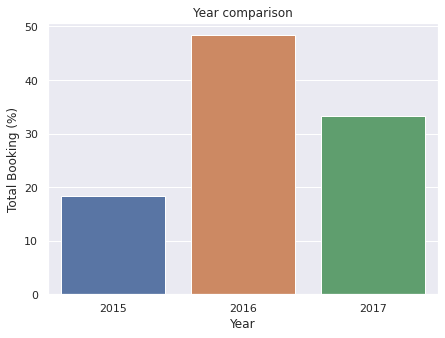

In [35]:
df_not_canceled = df[df['is_canceled'] == 0]
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

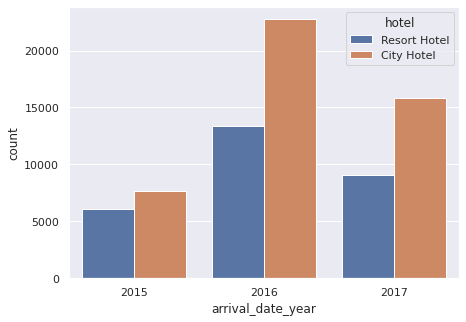

In [36]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

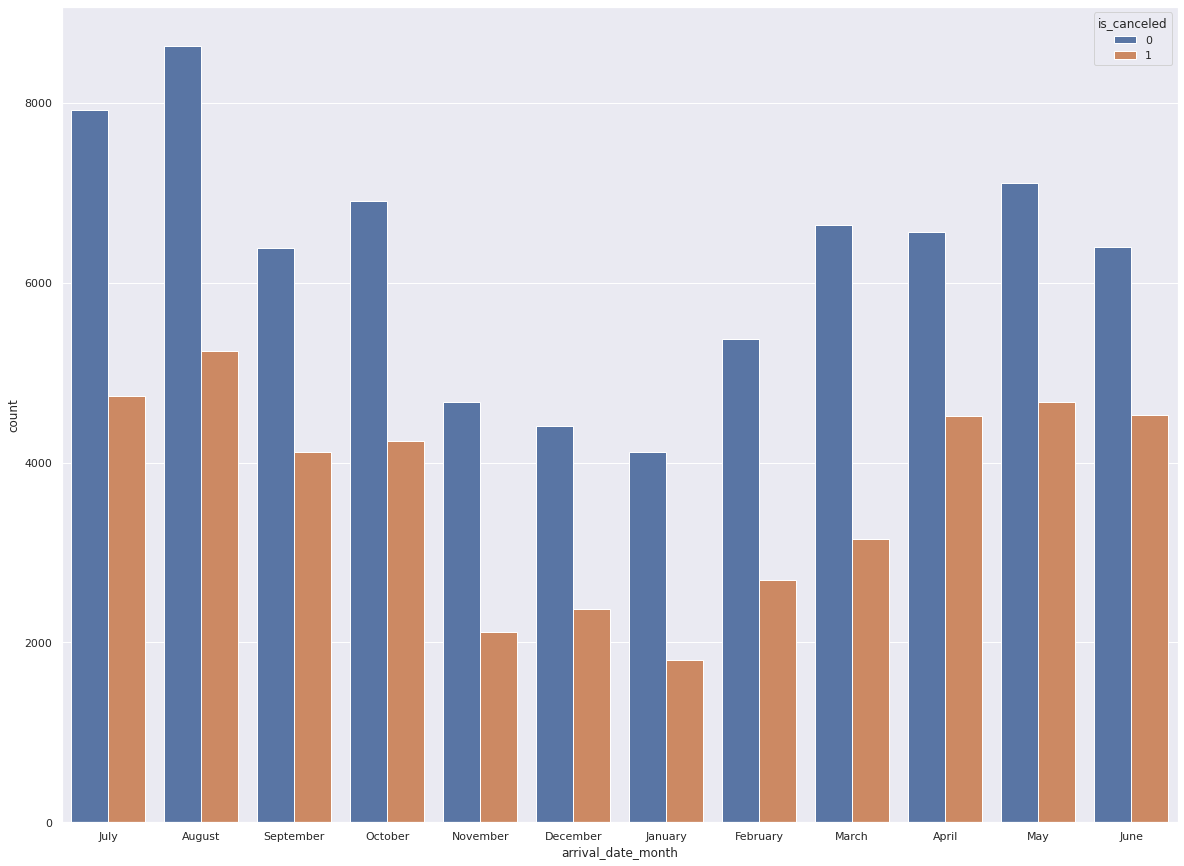

In [42]:
#checking out the month the bookings happened
plt.figure(figsize=(20,15))
sns.countplot(x='arrival_date_month',hue='is_canceled',data=df)

Text(0.5, 1.0, 'Graph showing number of arrival per day')

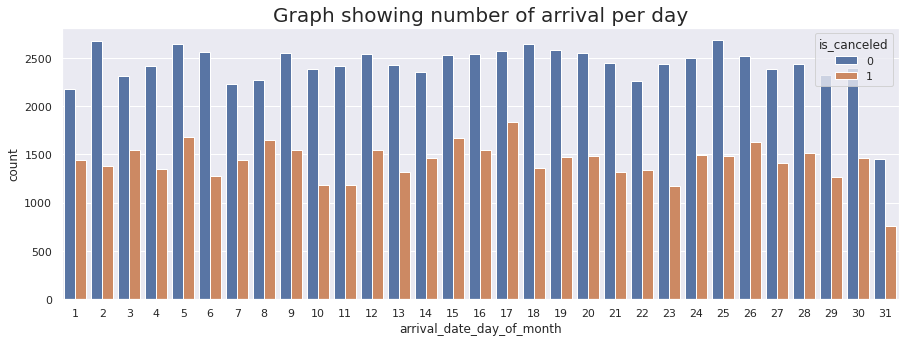

In [49]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df[lst3]

plt.figure(figsize=(15,5))
sns.countplot(x='arrival_date_day_of_month',hue='is_canceled',data=df).set_title('Graph showing number of arrival per day', fontsize = 20)

We do notice a roller coaster trend for the arrival day of month.


I can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.


**Lets find  whether the stay is over a weekend or weekday.**

Text(0.5, 1.0, 'Number of stays on weekend nights')

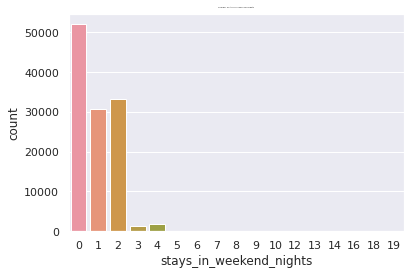

In [52]:
sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 2)

Another way to do the same -

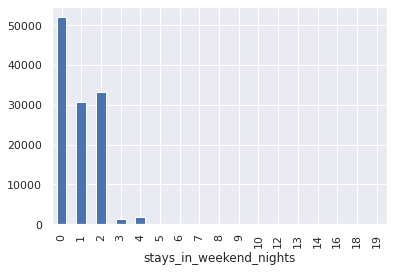

In [53]:
df.groupby('stays_in_weekend_nights')['is_canceled'].count().plot(kind='bar')

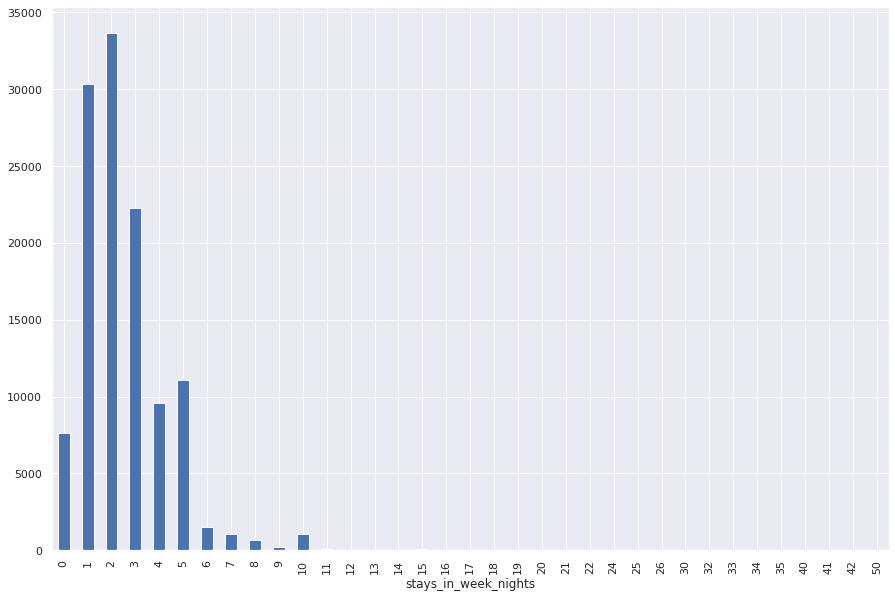

In [54]:
plt.figure(figsize=(15,10))
df.groupby('stays_in_week_nights')['is_canceled'].count().plot(kind='bar')

It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

**stays_in_weekend_nights VS stays_in_week_nights**

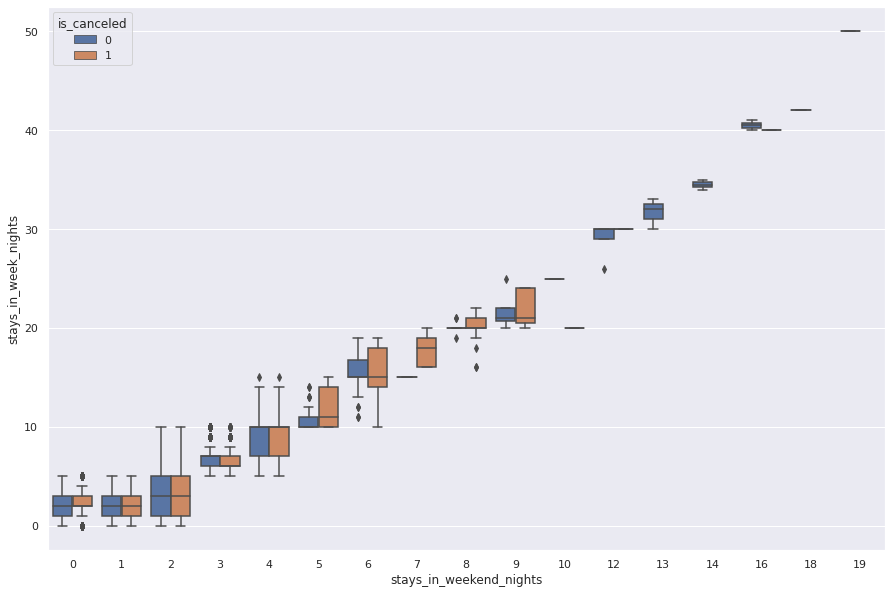

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(x='stays_in_weekend_nights',y='stays_in_week_nights',hue='is_canceled',data=df)


**Type of visitors**

Text(0.5, 1.0, 'Number of adults')

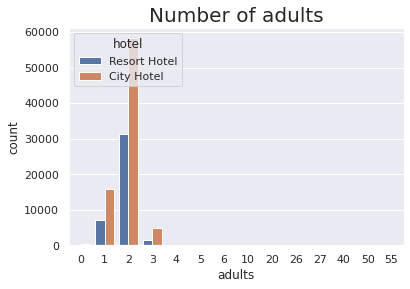

In [57]:
sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

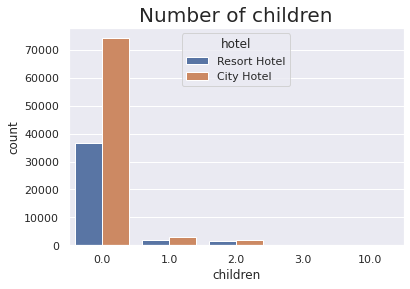

In [59]:
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

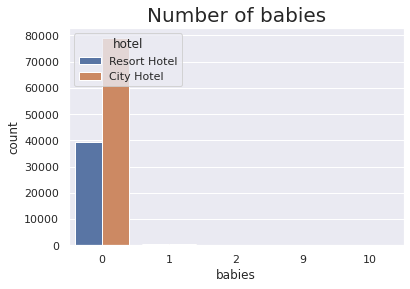

In [60]:
sns.countplot(data = df, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

It seems that majority of the visitors travel in pair. Thos that travel with children or babies have no specific preference for the type of hotel. We do see that those bringing babies along prefer resort hotels.

**Looking into which countries the visitors are from?**

We will want visitors with no cancellation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


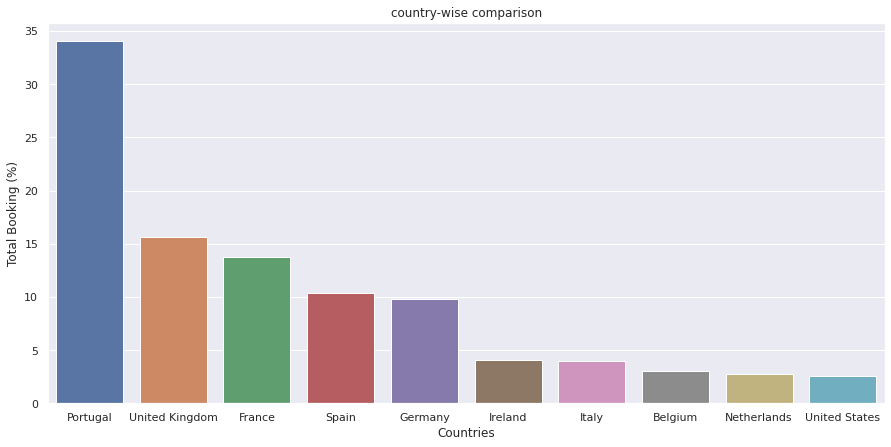

In [63]:
x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

We have a huge number of visitors from western europe, namely France,UK and Portugal being the highest.

We can instruct the marketing team to target people of this region.

**Looking into deposit types**

In [19]:
df.groupby(['deposit_type','is_canceled'])['lead_time'].count()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
Name: lead_time, dtype: int64

Text(0.5, 1.0, 'Graph showing types of deposits')

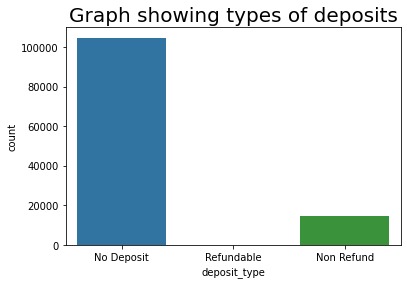

In [8]:
import seaborn as sns
sns.countplot(data = df, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.

**Overview of repeated guests-**

In [17]:
df.groupby(['is_repeated_guest','hotel'])['is_canceled'].count()

is_repeated_guest  hotel       
0                  City Hotel      77298
                   Resort Hotel    38282
1                  City Hotel       2032
                   Resort Hotel     1778
Name: is_canceled, dtype: int64

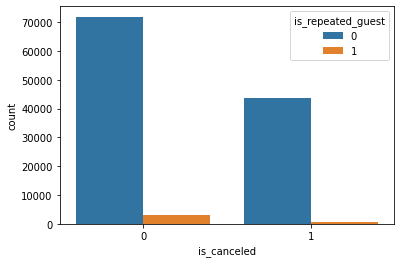

In [18]:
sns.countplot(x='is_canceled',hue='is_repeated_guest',data=df)

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

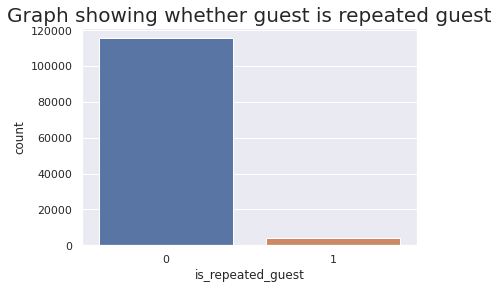

In [70]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

Low number of repeated guests.


A need to target repeated guests since they have booked before.

**Looking at types of guests-**

Text(0.5, 1.0, 'Graph showing type of guest')

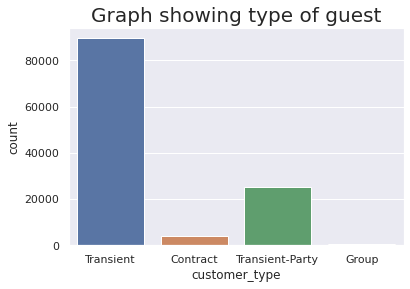

In [71]:
sns.countplot(data = df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.

**Looking into prices per month per hotel-**

average daily rate =  𝑆𝑢𝑚𝑂𝑓𝐴𝑙𝑙𝐿𝑜𝑑𝑔𝑖𝑛𝑔𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛 /𝑇𝑜𝑡𝑎𝑙𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑆𝑡𝑎𝑦𝑖𝑛𝑔𝑁𝑖𝑔ℎ𝑡

average daily rate per person =  𝐴𝐷𝑅 / 𝐴𝑑𝑢𝑙𝑡𝑠+𝐶ℎ𝑖𝑙𝑑𝑟𝑒𝑛

We will need to find out average daily rate per person

 

In [ ]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
# actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')


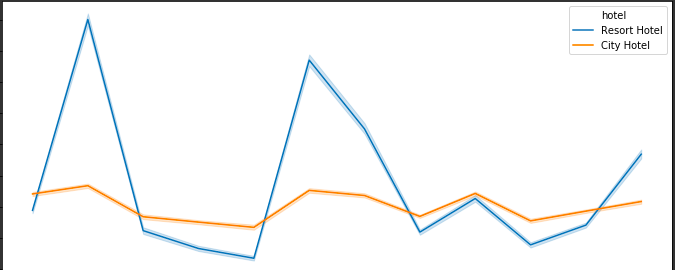

Prices of resort hotel are much higher. It seems that that is definitely the case since resort hotels specialise in that.

Prices of city hotel do not fluctuate that much.

**Feature selection and feature engineering**

In [ ]:
df_subset = df.copy()


In [ ]:
df_subset = df_subset.drop(['reservation_status'], axis=1)

In [ ]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [ ]:
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','previous_bookings_not_canceled'],axis=1)

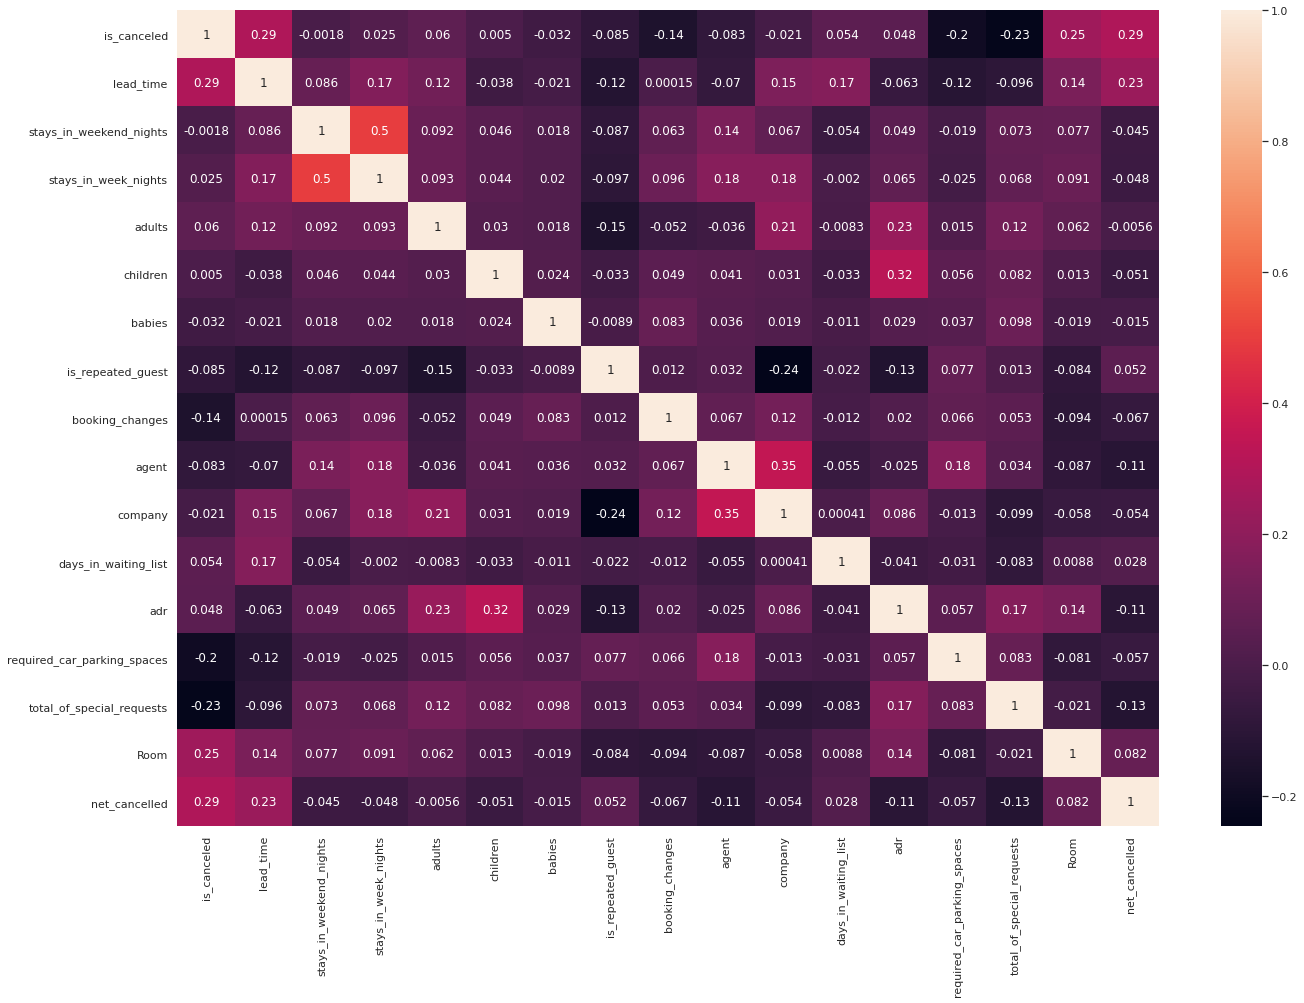

In [ ]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

**Let's find the most busy month for hotel-**








/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


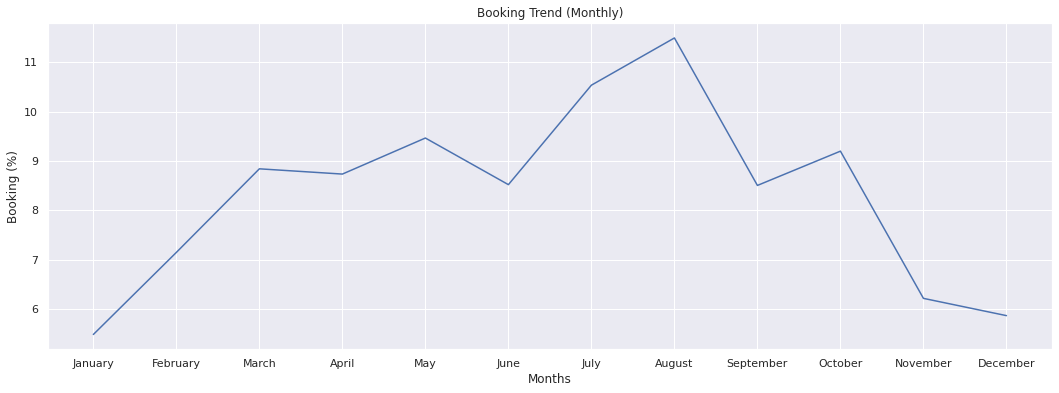

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


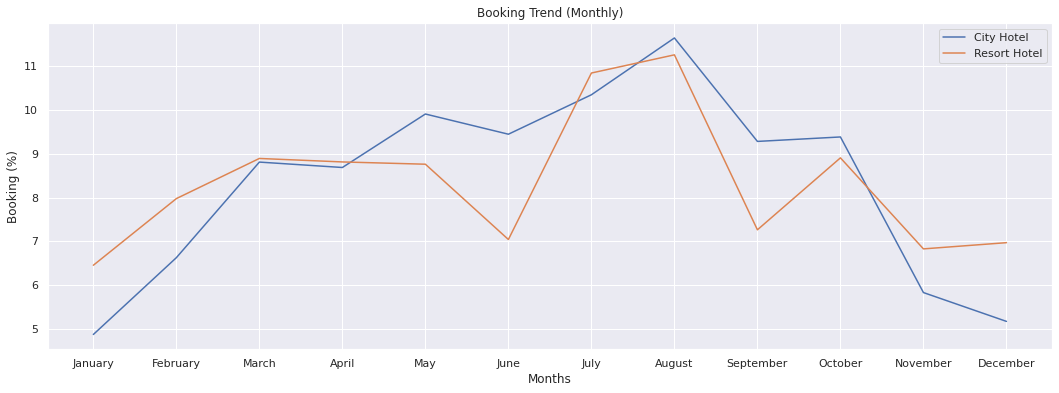

In [ ]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()

So,August is the most busy month of the year. 

Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.

**Number of nights stay in hotels**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


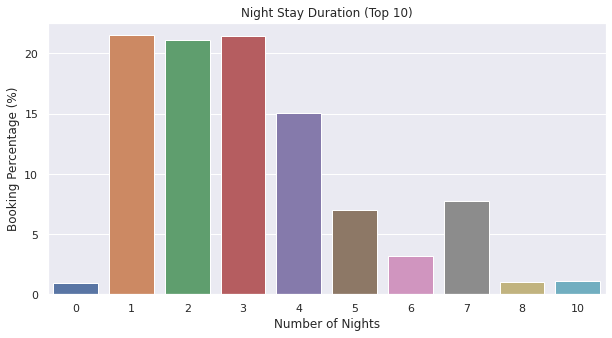

In [ ]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


**Hotel wise number of stays -**




/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


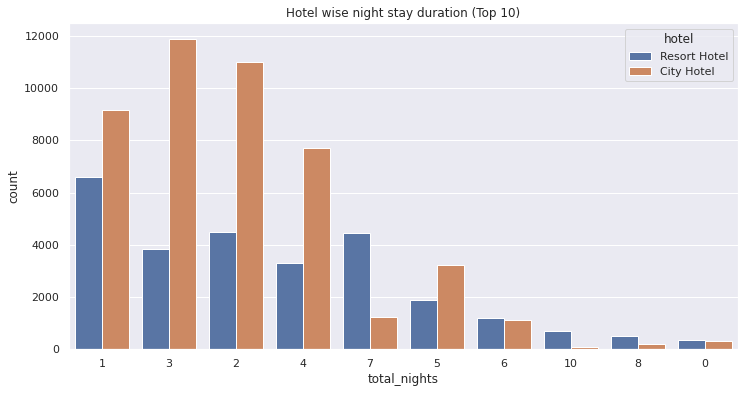

In [ ]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


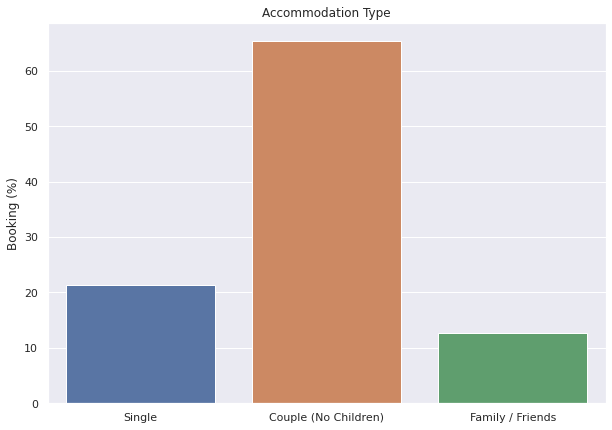

In [ ]:

#7.Which was the most booked accommodation type (Single, Couple, Family)?

## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

**stays_in_weekend_nights VS stays_in_week_nights**

In [ ]:
#arrival month and cancelation and whether resort or city
df.groupby(['hotel','arrival_date_day_of_month'])['is_canceled'].count()

hotel         arrival_date_day_of_month
City Hotel    1                            2332
              2                            2667
              3                            2530
              4                            2461
              5                            2857
                                           ... 
Resort Hotel  27                           1265
              28                           1276
              29                           1214
              30                           1473
              31                            856
Name: is_canceled, Length: 62, dtype: int64

Text(0, 0.5, 'Count')

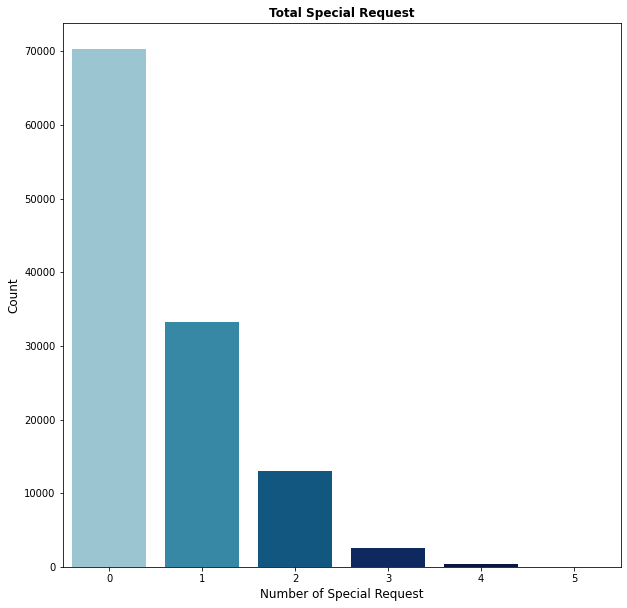

In [23]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=df, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Around 55% of bookings do not have any special requests.

Text(0, 0.5, 'Count')

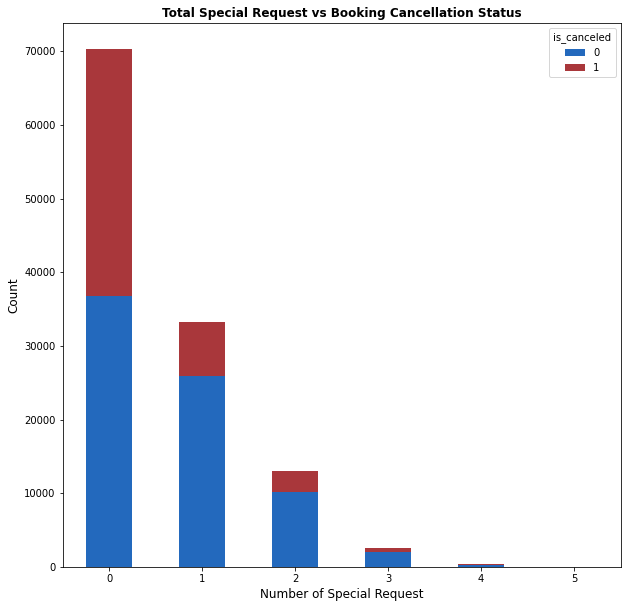

In [24]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Graph is about the relationship between special requests and cancellation booking status. Nearly half bookings without any special requests have been canceled and another half of them have not been canceled.

**Unique finding and My contributions**



---



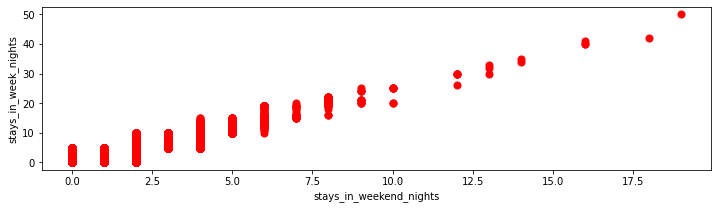

In [26]:
df.plot.scatter(x='stays_in_weekend_nights',y='stays_in_week_nights',c='red',s=50,figsize=(12,3))

If the points on the scatter plot seem to form a line that slants up from left to right, there is a positive relationship or positive correlation between the variables.

# `arrival_date_year` vs `lead_time` vs `is_canceled` exploration with violin plot

Text(0, 0.5, 'Lead Time')

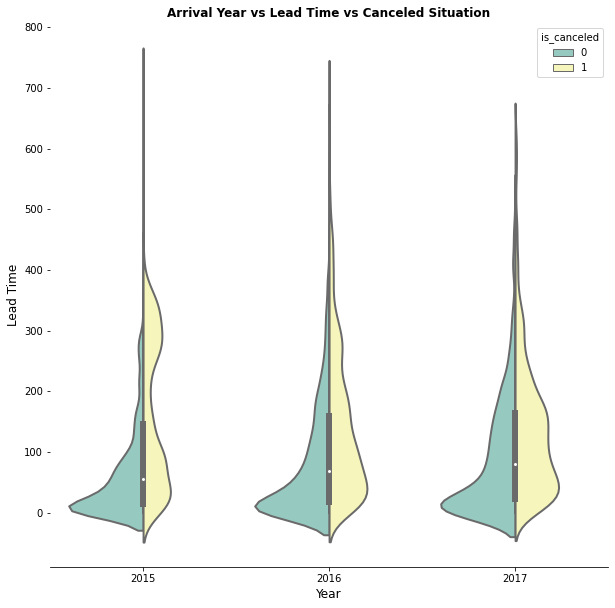

In [27]:
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Graph shows the relationship of arrival_date_year to lead_time with booking cancellation status. Three violin plots are correponding to three different years. For canceled booking, means and interquartile ranges are similar in all years. But the shapes of the distributions are quite different from each other. 


**Another important features which are related to time are stays_in_week_nights and stays_in_weekend_night features.**





In [31]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = df['stays_in_week_nights'],columns=df['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


In [32]:
## Creating new feature: `Weekday vs Weekend` 

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
           df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

Text(0, 0.5, 'Count')

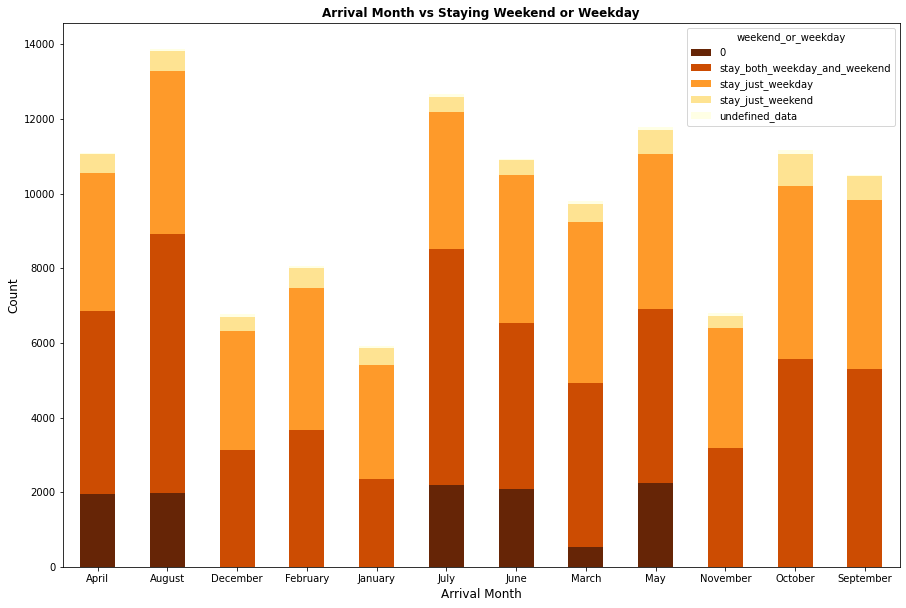

In [30]:
df['arrival_date_month']= df['arrival_date_month'].astype('string')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='YlOrBr_r',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

graph is about weekend_or_weekday feature's relationship with arrival_date_month. The bar graph shows that most bookings were made to stay only for weekdays or both weekdays and weekends. On the other, numbers of staying just the weekend category are quite low compared to other categories.

**Another exploration is made for the arrival_date_month feature.**

In [33]:
#`arrival_date_month` names converted to the numbers

df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

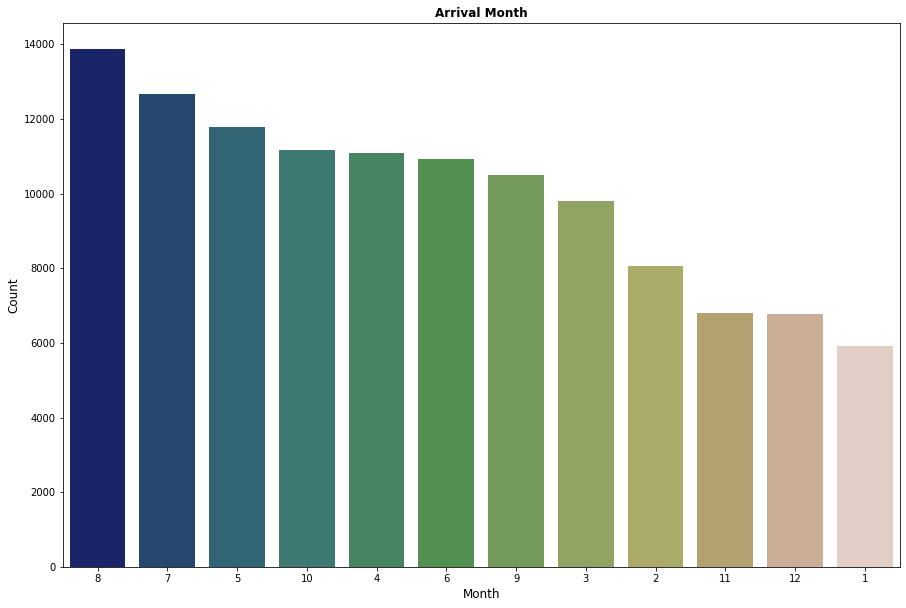

In [34]:
#`arrival_date_month` exploration 

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = df,
              order=pd.value_counts(df['arrival_date_month']).index, palette='gist_earth')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.

**Implementing donut pie graph shows the meal categories**

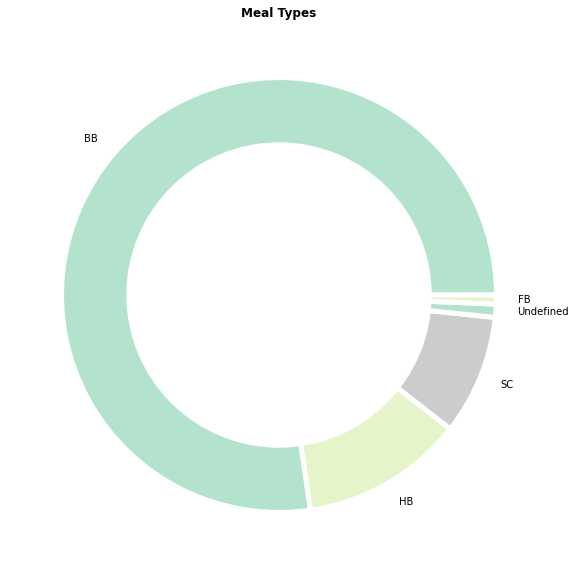

In [35]:
meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

There is a big difference in the Bed&Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

In [36]:
# Percentage of Cancelation
print('Percentage of calculation in City Hotel: ',(32185/79329)*100)
print('Percentage of calculation in Resort Hotel: ',(10831/40060)*100)

Percentage of calculation in City Hotel:  40.57154382382231
Percentage of calculation in Resort Hotel:  27.03694458312531


There is no Observation about reservation status in notebooks -

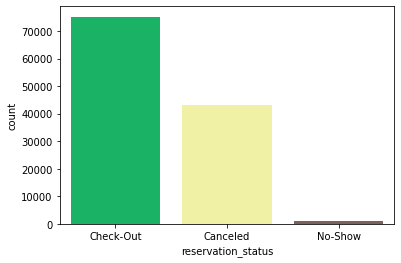

In [39]:
sns.countplot(x="reservation_status", data = df, palette="terrain")
plt.show()

In [37]:
hotel_bookings_1 = df[df['hotel'] == 'City Hotel']
hotel_bookings_1['reservation_status'].value_counts()

Check-Out    46228
Canceled     32186
No-Show        916
Name: reservation_status, dtype: int64

In [38]:
hotel_bookings_2 = df[df['hotel'] == 'Resort Hotel']
hotel_bookings_2['reservation_status'].value_counts()

Check-Out    28938
Canceled     10831
No-Show        291
Name: reservation_status, dtype: int64

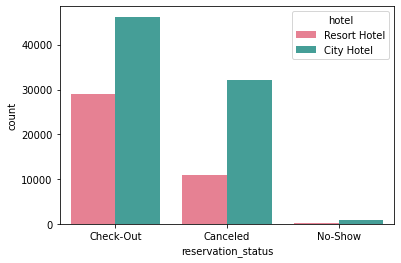

In [41]:
sns.countplot(x='reservation_status',hue='hotel',data=df,palette="husl")

I find that 58% of reservation status is of check-out .

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

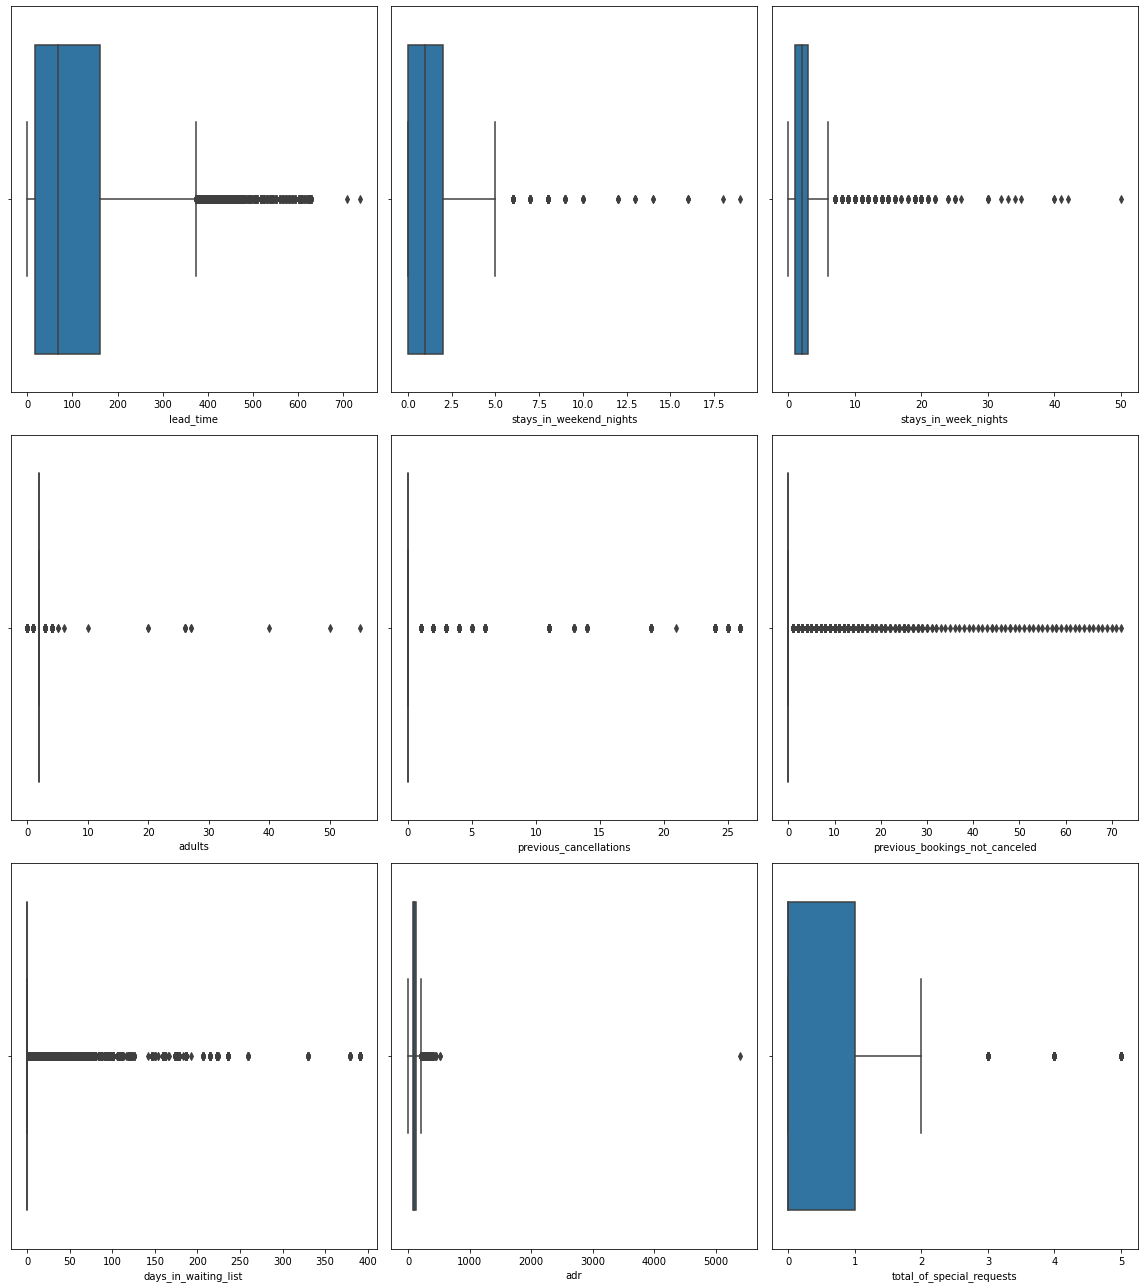

In [42]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(df[feature])
    n+=1
    plt.tight_layout()

Statistics shows that there are many Outliers. They will be treated eventually

** Looking into adults and children to find the reason behind choosing hotels **

In [43]:
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [44]:
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.¶So,large families prefer resort hotel more and city hotel are prefered by small families or business families. Hence proved.

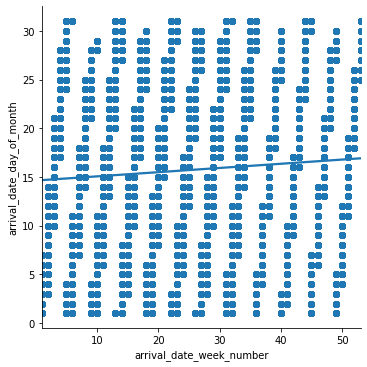

In [25]:
sns.lmplot(x='arrival_date_week_number',y='arrival_date_day_of_month',data=df)

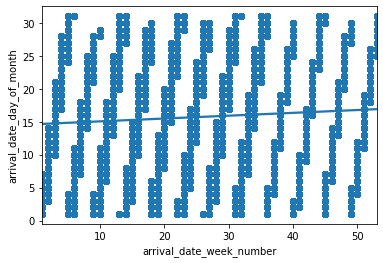

In [45]:
sns.regplot(x='arrival_date_week_number',y='arrival_date_day_of_month',data=df)

Linear regression model fails on two components- aarival_date_week-number and arrival_date_day_of_month. So try to implement Logistic Regression.

**Logistic Regression.**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [107]:
d1f = pd.read_csv(csv_file)
df1 = df.iloc[0:2999]
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [86]:
df_new = df1.copy()[['required_car_parking_spaces','lead_time','booking_changes','adr','adults', 'is_canceled']]
df_new.head()

,required_car_parking_spaces,lead_time,booking_changes,adr,adults,is_canceled
0,0,342,3,0.0,2,0
1,0,737,4,0.0,2,0
2,0,7,0,75.0,1,0
3,0,13,0,75.0,1,0
4,0,14,0,98.0,2,0


In [87]:
x = df_new.drop(['is_canceled'], axis=1)
y = df_new['is_canceled']

 I am trying to split the dataset based on the top 5 that have the most significant correlation to the target (is_canceled), which are required_car_parking_spaces’, ’lead_time’, ’booking_changes’, ’adr’, ’adults,’ and ‘is_canceled.’

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [89]:
model_LogReg_Asli= LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m=model_LogReg_Asli.coef_[0][0]
c=model_LogReg_Asli.intercept_[0]

[[-4.05812101  0.0065949  -0.77725534  0.00978826  0.08451063]]
[-2.01165506]


In [90]:
y_pred_lr=model_LogReg_Asli.predict(x_test)

In [91]:
coba=x_test.iloc[:1]
model_LogReg_Asli.predict(coba)
coba

,required_car_parking_spaces,lead_time,booking_changes,adr,adults
2399,0,12,0,50.4,2


In [92]:
model_LogReg_Asli.score(x_train,y_train)

0.68528553563985

In [93]:
model_LogReg_Asli.score(x_test,y_test)

0.6933333333333334

In [94]:
confusion_matrix(y_test,y_pred_lr)

array([[411,   1],
       [183,   5]])

In [96]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       412
           1       0.83      0.03      0.05       188

    accuracy                           0.69       600
   macro avg       0.76      0.51      0.43       600
weighted avg       0.74      0.69      0.58       600



As you can see above, the Logistic Regression model has about 69.3 percent of accuracy.

**Summary**

1. Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.

2. We also realise that the high rate of cancellations can be due high no deposit policies.

3. We should also target months between May to Aug. Those are peak months due to the summer period.

4. Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.

5. Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

6. Hotel Demand Booking will help to Identify the likelihood of bookings being cancelled and makes it possible for hotel managers to take measures to avoid these potential cancellations, such as offering services, discounts, or other perks.





**References**



*   https://github.com/amalphonse/hotel_booking_demand/blob/master/hotel_booking.ipynb

*  https://www.kaggle.com/prashanthsri12/hotel-demand-eda-basic



*  https://github.com/aaqibqadeer/Hotel-booking-demand/blob/master/Hotel%20Booking.ipynb







